# The Lorenz Differential Equations

Before we start, we import some preliminary libraries. We will also import (below) the accompanying `lorenz.py` file, which contains the actual solver and plotting routine.

interactive(children=(FloatSlider(value=2.5, description='freq', max=5.0), Output()), _dom_classes=('widget-in…

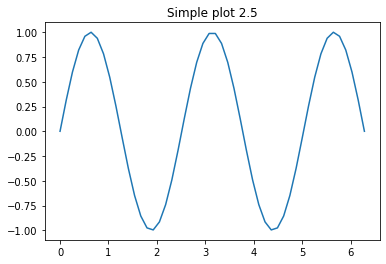

In [5]:
%matplotlib inline
from ipywidgets import interactive, fixed
import matplotlib.pyplot as plt
import numpy as np
def plot_func(freq):
    x = np.linspace(0, 2*np.pi)
    y = np.sin(x * freq)
    fig, ax = plt.subplots()
    #plt.plot(x, y)
    ax.plot(x, y)
    ax.set_title('Simple plot ' + str(freq))
    print(freq)
    plt.show    

w=interactive(plot_func, freq = (0.0,5.0))
w           

We explore the Lorenz system of differential equations:

$$
\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{aligned}
$$

Let's change (\\(\sigma\\), \\(\beta\\), \\(\rho\\)) with ipywidgets and examine the trajectories.

In [4]:
from lorenz import solve_lorenz
w=interactive(solve_lorenz,sigma=(0.0,50.0),rho=(0.0,50.0))
w

interactive(children=(FloatSlider(value=10.0, description='sigma', max=50.0), FloatSlider(value=2.666666666666…

For the default set of parameters, we see the trajectories swirling around two points, called attractors. 

The object returned by `interactive` is a `Widget` object and it has attributes that contain the current result and arguments:

In [17]:
t, x_t = w.result

In [18]:
w.kwargs

{'sigma': 10.0, 'beta': 2.6666666666666665, 'rho': 28.0}

After interacting with the system, we can take the result and perform further computations. In this case, we compute the average positions in \\(x\\), \\(y\\) and \\(z\\).

In [19]:
xyz_avg = x_t.mean(axis=1)

In [20]:
xyz_avg.shape

(30, 3)

Creating histograms of the average positions (across different trajectories) show that, on average, the trajectories swirl about the attractors.

In [21]:
from matplotlib import pyplot as plt

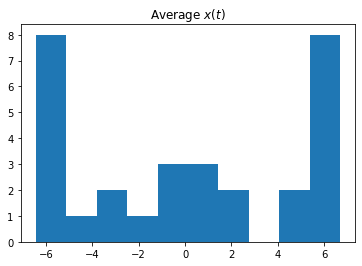

In [22]:
plt.hist(xyz_avg[:,0])
plt.title('Average $x(t)$');

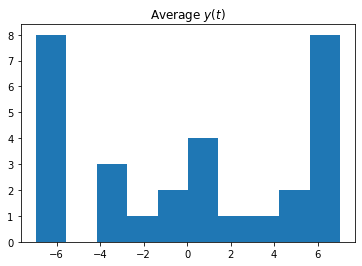

In [23]:
plt.hist(xyz_avg[:,1])
plt.title('Average $y(t)$');